In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
vgs = pd.read_csv('top100videogamesales.csv')
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data.
This stacked bar chart shows all regional sales, shown in different colors, grouped by specific publishers. Nintendo seems to be the most frequent publisher.

<Axes: title={'center': 'Total sales for each Publisher by Region'}, xlabel='Publisher', ylabel='Total Sales'>

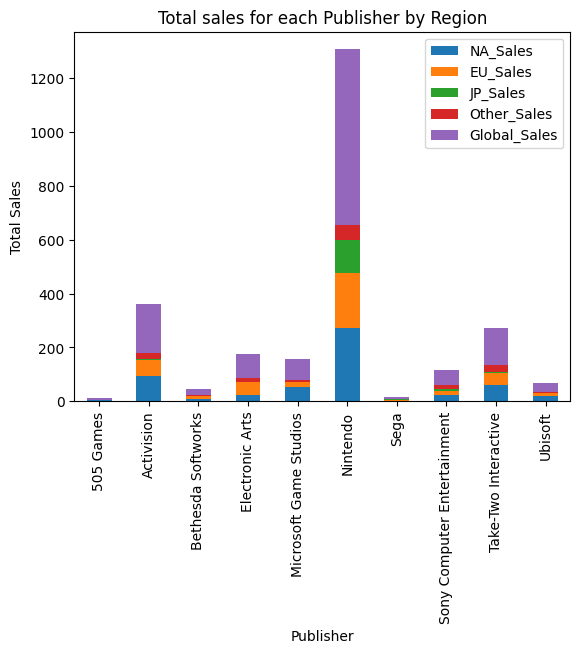

In [6]:
vgs = vgs.groupby('Publisher').sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
vgs.plot.bar(stacked=True, title='Total sales for each Publisher by Region', ylabel='Total Sales')


## Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

<Axes: title={'center': 'Total Global Sales for each year'}, xlabel='Global_Sales', ylabel='Year'>

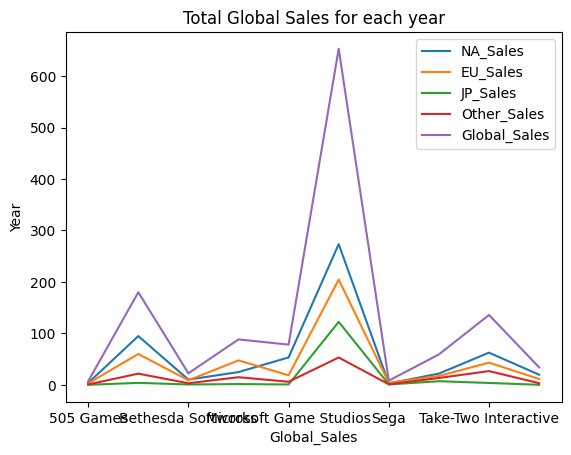

In [18]:
vgs.plot.line(title='Total Global Sales for each year', xlabel='Global_Sales', ylabel='Year')


## Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.



In [25]:
filtered_genre = vgs[vgs['Genre'].str.contains(' Action ')]
plt.hist(filtered_genre)
plt.title('Global Sales Distribution for Action Genre Games')
plt.xlabel('Global_Sales')
plt.show()

KeyError: 'Genre'

## North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

## European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

## Explain differences and similarities between the North American and European charts in markdown.

## Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

## Determine the appropriate charts to answer the following questions

What genre of game is present the most in the top 100 games from 2000-2015?
What percentage of global sales does PlayStation have in the dataset?
What is the distribution of sales for Shooter games?
Explain each chart using markdown.
Use color and line options to override default chart designs for all charts.
-think about using a consistent color palette or design scheme.